# Tutorial exercises: Sampling

In these exercises we again work with the Brexdex data

We are going to investigate how the sampling distribution of the mean depends on $n$, the relationship between SEM and $\sqrt{n}$, and how we assess whether a distribution, such as the sampling distribution of the mean, is Normal.

<font color=red>Tutors - some of these exercises are recapping material that was covered directly in the reading, some is extending the same ideas. This week's reading was quite long and difficult so I think a recap is in order!</font>

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## Import and plot the data

Let's remind ourselves of the dataset we are working with

In [2]:
UKBrexdex=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2025/main/data/UKBrexdex.csv')
UKBrexdex

,ID_code,score
0,186640,53
1,588140,90
2,977390,30
3,948470,42
4,564360,84
...,...,...
9995,851780,81
9996,698340,45
9997,693580,51
9998,872730,78


* What variables are in the dataset?
* How many people are in the sample?

and let's plot the data

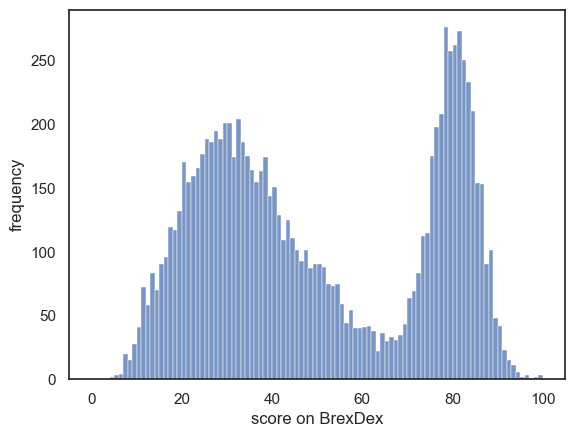

In [3]:
sns.histplot(UKBrexdex.score, bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')
plt.show()

How would you describe this data?
* write some text, including descritive statatistics, to describe the distribution of Brexdex scores in the UK population
* <font color='red'>The distribution is bimodal, with a broad peak of low scores (around 30), and a narrower peak of high scores (around 80). Few people have intermediate scores (50-70)</font>

## Drawing a sample - recap

We can draw a sample from our dataframe using `df.sample()`. The output of `df.sample()` is another dataframe (with $n$ rows, where $n$ is the sample size)

If we like, we can save this dataframe with a new name, like `mySample`

* Create a new dataframe called `mySample` containing 10 people randomly sampled from the Brexdex dataset
* Get the mean score for this sample


In [4]:
mySample = UKBrexdex.sample(n=10, replace=False)

display(mySample)
print('sample mean = ' + str(mySample.score.mean()))

,ID_code,score
7495,665220,82
4991,905080,39
4527,513800,45
1691,989860,79
1949,424820,82
9692,367670,30
5745,423670,81
6685,529840,81
4165,451190,27
7222,162470,80


sample mean = 62.6


## Sampling distribution of the mean

In general we are not interested in any specific sample, but just in working out how much random variation to expect between samples. To quantify this random variation we will need to generate a lot of samples (in a loop) but we don't need to save each sample as a new dataframe, we can just save the sample mean from each sample into an array.

Let's do this in steps:

First, get a sample of 10 people from the Brexdex distribution, find their mean score, and save it as a variable `m` - this should be a single line of code and if we print m, we should get a single number (somewhere near 50)

In [5]:
m = UKBrexdex.sample(n=10, replace=False).score.mean()
m

np.float64(54.4)

Now let's make a loop to do this 50 times and save the mean of each sample into an array called `m`. When we print out `m`, we should now get an array of 50 numbers.

In [6]:
m = np.zeros(50)
for i in range(len(m)):
    m[i] = UKBrexdex.sample(n=10, replace=False).score.mean()
   
m

array([69.2, 47.4, 44.5, 54.6, 50.2, 45.9, 57.8, 34.4, 37.1, 51.9, 51.5,
       51.1, 45.3, 60.8, 43.2, 50.4, 44.7, 44.5, 62. , 49.3, 62.1, 54.4,
       55.2, 62.9, 54.4, 48.2, 47.1, 55.2, 34.1, 45.1, 52.8, 38.7, 48.5,
       40. , 57.9, 51.6, 45.8, 46.8, 41.1, 55.7, 57. , 51.2, 50.7, 48.4,
       35. , 40. , 51.1, 42.3, 40. , 52.7])

<font color='red'>Many students struggle with `for` loops, which we covered in the 'Hackathon' in week one. When looking at the code block above with students I find it is helpful to show the cell output (`m`) resulting from the following coding errors:

``m = np.zeros(50)``<br>
``for i in range(len(m)):``<br>
``   m = UKBrexdex.sample(n=10, replace=False).score.mean()``

``m = np.zeros(50)``<br>
``for i in range(len(m)):``<br>
``    m[5] = UKBrexdex.sample(n=10, replace=False).score.mean()``

<font color='red'>Futher practice of loops can be found on Datacamp in the module on 'flow control'
</font>

Change the code above to get
* 100 samples of size 10
* 10 samples of size 100

Finally, let's get the sample means for 10000 samples of size 50 and plot them on a histogram

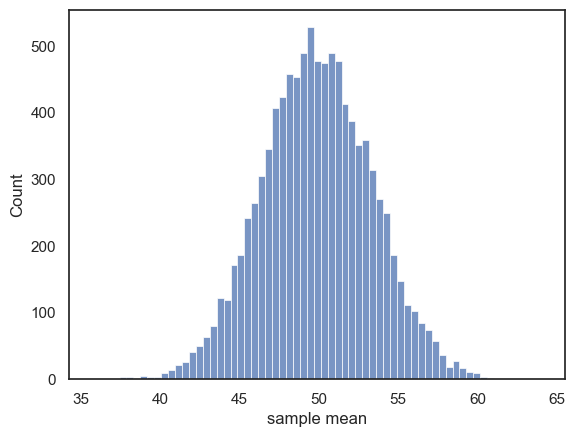

In [7]:
m = np.empty(10000)
for i in range(len(m)):
    m[i] = UKBrexdex.sample(n=50, replace=False).score.mean()

sns.histplot(m)
plt.xlabel('sample mean')
plt.show()

## Standard error of the mean

The standard error of the mean is the standard deviation of the sampling distribution of the mean.

Let's work out the SEM from the distribution of sample means we just generated:

In [8]:
m.std()

np.float64(3.4655463482550624)

The SEM can also be calculated as $$ SEM = \frac{\sigma}{\sqrt{n}} $$

In [9]:
# calculate the standard deviation of the Brexdex data
sigma = UKBrexdex.score.std()

# n is the SAMPLE size
n=50

# Fill in the equation for the SEM
sigma/(n**0.5)

np.float64(3.5062201666731823)

Hopefully the two values match well.

## Shape of the sampling distribution

Here we explore the shape of the sampling distribution of the mean

### Sampling distribution of the mean when $n$ is small

Let's start by simulating what the sampling distribution of the mean looks like for small values of $n$ - starting with $n=1$

#### $n=1$

Write some code to draw 10,000 samples with n=1, obtain the mean of each sample, and plot the means.

**Think**
* Before you run it, think: what will this 'sampling distribution of the mean' look like?

<font color='red'>Each sample is just one datapoint, so this sampling distribution is itself just like a sample of 100 individuals (rather than 100 means). As the sample data distribution resembles the aprent data distribution, this 'sampling distribution of the mean' with $n=1$ should resemble the original bimodal BrexDex distribution</font>

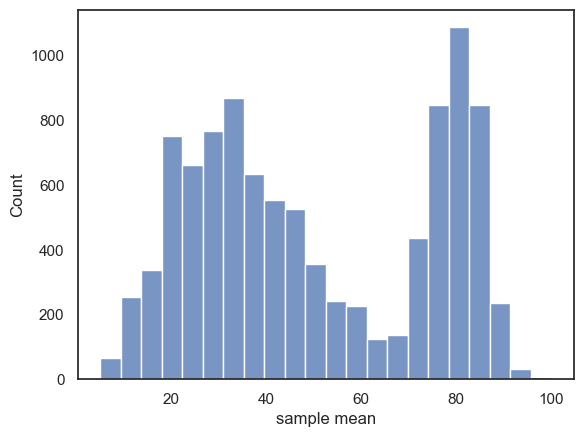

In [10]:
# Your code here!
# Note this can be copied from examples earlier in the chapter
nSamples = 10000 # we will draw 10,000 samples
samplesize=1 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = UKBrexdex.sample(n=samplesize, replace=False)
    m[i]=sample.score.mean()

sns.histplot(m)
plt.xlabel('sample mean')
plt.show()

In fact when $n=1$, the sample mean is simply the value of the (one) person in the sample's score, so the sampling distribution of the mean is exactly the sample data distribution

#### $n=2$

Write some code to draw 10,000 samples with n=2, obtain the mean of each sample, and plot the means.

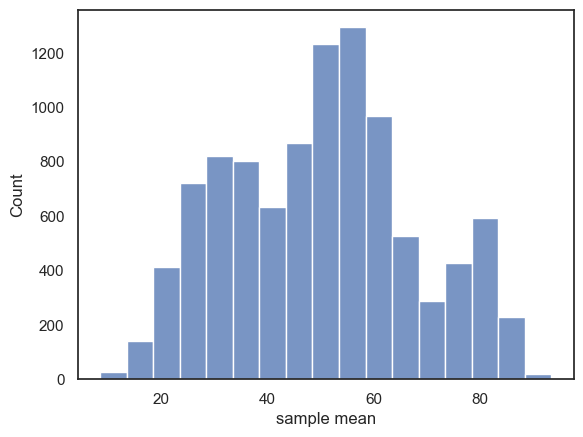

In [11]:
# Your code here!
# Note this can be copied from examples earlier in the chapter
nSamples = 10000 # we will draw 10,000 samples
samplesize=2 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = UKBrexdex.sample(n=samplesize, replace=False)
    m[i]=sample.score.mean()

sns.histplot(m, binwidth=5)
plt.xlabel('sample mean')
plt.show()

Hopefully you have noticed a middle peak emerging.

**Think**-

A simple summary of the Brexdex distribution is that people are either pre-Brexit (belonging to the lower mode of the distribution, the hump of scores below 50%), or they are against Brexit (belonging to the upper mode).

If we draw a sample of $n=2$, there are four possible outomes:

* pro-pro
* pro-against
* against-pro
* against-against

Case 1 yields low scores, case 4 yields high scores, and cases 2 and 3 yield intermediate scores.

How does this relate to the simulated sampling distribution of the mean you plotted?

#### $n = 3,4,5$

As $n$ increases, we rapidly see a unimodal, bell-curve-like shape emerging

Write some code to simulate the sampling distribution of the mean for 10,000 samples each of $n=3,4,5$ and plot a histogram of the sample means for each value of $n$. Organise these plots as subplots next to or above each other (you decide which is more informative)

To do this, you will need to use a double `for`-loop. I have completed some parts of the code to get you started.

<font color='red'>To compare the sampling distributions effectively, students should plot them above eachother and match the scales on the x-axis</font>

In [12]:
# Note this can be copied from examples in chapter 0 ("prepwork")
nSamples = 10000 # we will draw 10,000 samples
samplesize=[3,4,5] # each sample contains n people

for j in range(len(samplesize)):
    m=np.empty(nSamples) # make an array to store the means

    for i in range(nSamples):
        # Your code here to fill in m with sample means
        sample = UKBrexdex.sample(n=samplesize, replace=False)
        m[i]=sample.score.mean()
        
    plt.subplot(3,1,j+1)
    sns.histplot(m, bins=range(0,100,5))
    plt.xlabel('sample mean')

plt.tight_layout()
plt.show()

TypeError: '<' not supported between instances of 'list' and 'int'

## SEM is proportional to $\frac{1}{\sqrt{n}}$

The standard error of the mean, which is the width of the sampling distribution of the mean, is inversely proportional to the square root of the sample size $n$

Using the double loop, as above, we can plot the SEM calculated in two ways:
* as the standard deviation of the simulated sampling distribution of the mean
* From the equation

... for a range of values of n

Complete the code block below:

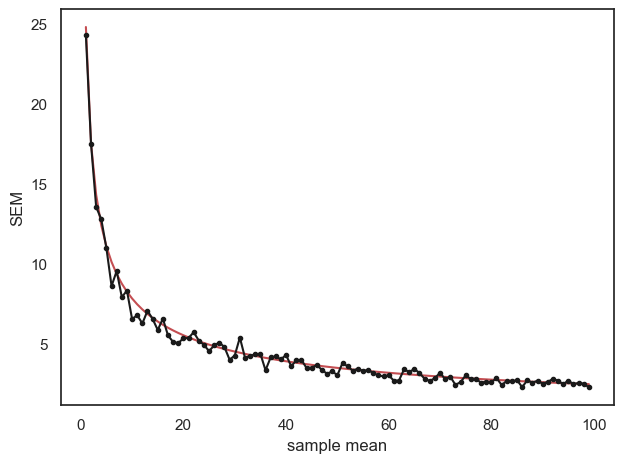

In [42]:
nSamples = 100 # we will draw 100 samples at each samplesize
samplesizes=range(1,100) # try all values of n from 1 to 100
simulatedSEM=np.zeros(len(samplesizes))
calculatedSEM=np.zeros(len(samplesizes))

for j in range(len(samplesizes)):
    m=np.zeros(nSamples) # make an array to store the means

    for i in range(nSamples):
        # Your code here to fill in m with sample means
        m[i] = UKBrexdex.score.sample(n=samplesizes[j], replace=False).mean()

    simulatedSEM[j] = m.std()
    calculatedSEM[j] = UKBrexdex.score.std()/(samplesizes[j]**0.5)

plt.plot(samplesizes, calculatedSEM, 'r')
plt.plot(samplesizes, simulatedSEM, 'k.-')

plt.xlabel('sample mean')
plt.ylabel('SEM')

plt.tight_layout()
plt.show()

## When does the CLT apply?

The Central Limit Theorem states that the sampling distribution of the mean is estimated by $\mathcal{N}(\bar{x},\frac{s}{\sqrt{n}})$ when $n$ is large

But how large is large enough?

A good rule of thumb is that the Central Limit Theorem applies for $n>50$, and a larger $n$ is required for a roughly normal sampling distribution when the data distribution is grossly non-normal (such as the bimodal Brexdex distribution). 

In reality, the normal distribution becomes a closer and closer fit tot the sampling distribution of the mean as $n$ gets larger

### $n=100$

Let's start with a value of $n$ for which the central limit theorem should definitely apply, $n=100$

Now, we work out the mean and SEM that would be predicted for the sampling distribution of the mean, if the central limit theorem applied.

Finally we compare the predicted normal distribution to the simulated sampling distribution of the mean in a plot

**Note -**
The code to get the normal curve and histogram to match in scale is a bit fiddly, this was covered in the tutorial exercises last week

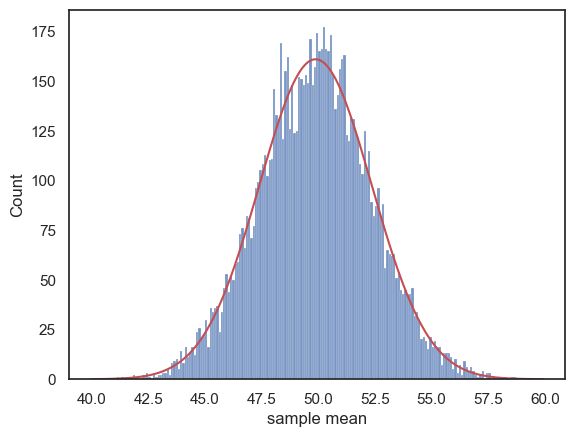

In [20]:
# first simulate the sampling distribution of the mean for 10,000 samples
nSamples = 10000
samplesize = 100
m=np.empty(nSamples) # make an array to store the means
binwidth=0.1

for i in range(nSamples):
    sample = UKBrexdex.sample(n=samplesize, replace=False)
    m[i]=sample.score.mean()
    
sns.histplot(m, bins=np.arange(40,60,binwidth))
 
# now work out the expected normal distribution
mu = UKBrexdex.score.mean()
sigma = UKBrexdex.score.std()
SEM = sigma/(samplesize**0.5)

x = np.arange(40,60,binwidth) # x axis values - you may wat to change these once you have tried plotting it
p = stats.norm.pdf(x,mu,SEM)
freq = p*nSamples*binwidth # exected frequency in each ibn is probability of the bin * total nSamples * bin width

plt.plot(x,freq,'r')
plt.xlabel('sample mean')
plt.show()

This is clearly quite a good fit.

Now try changing the `samplesize`, $n$, in the code block above, to $n=4$ (<b><i>hint:</b></i> change the histogram bins and x-axis values to  `np.arange(0,100,binwidth)`, and change `binwidth` to 1)

Hopefully, you can see that although the histogram on its own looked quite normal, it is actually not a great fit to the normal distribution we would expect if the Central Limit Theorem applied - the peak is too flat and there are fewer sample means out in the tails than we would expect - the distribution looks like a piece of Toblerone

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/toblerone.png" width="30%"  />

### Q-Q plot

The differences in the peak and tails of the distribution can be hard to spot on a histogram/Normal plot as above.

A type of plot designed to make these clearer exists - it is called a Q-Q (quantile-quantile) plot. In the Q-Q plot, we plot the quantiles of the data distribution (in this case our 10,000 simulated sample means) against the quantiles of the normal distribution.

If our data distribution was normal, the points would all fall on a straight line, but here we see the deviation at the tails of the distribution, reflecting the difference between the triangular tails of the simulated sampling distribution as opposed to the finely tapered tails of the normal distribution.

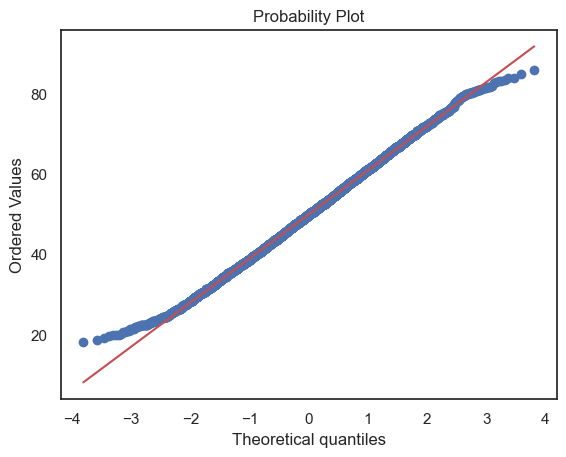

In [25]:
# first simulate the sampling distribution of the mean for 10,000 samples
nSamples = 10000
samplesize = 5
m=np.empty(nSamples) # make an array to store the means
binwidth=0.1

for i in range(nSamples):
    sample = UKBrexdex.sample(n=samplesize, replace=False)
    m[i]=sample.score.mean()

# Now make the Q-Q plot
stats.probplot(m, plot=plt)
plt.show()

* Try changing `samplesize` ($n$) back to smaller values ($n=2,3,4$) or larger value such as ($n=10,100$) in the code block above and remaking the Q-Q plot.

You should see the tails of the sampling distribution (in both the histogram and the Q-Q plot) start to match the normal distribution

* Try setting $n=2$ in the code block above and remaking the Q-Q plot. 

You should see the funny three-peak histogram - how is the shape of the histogram reflected in the Q-Q plot?